In [1]:
import numpy as np
import sys
sys.path.insert(0, "..")
from farkas.solver import MILP, LP
from farkas.problem import QSHeur
from farkas.model import DTMC, MDP

In [2]:
M = DTMC.from_prism_model("datasets/brp.pm",
                          prism_constants={("N",2),("MAX",1)},
                          extra_labels={("uncertain","s=5 & srep=2"),("all","true")})

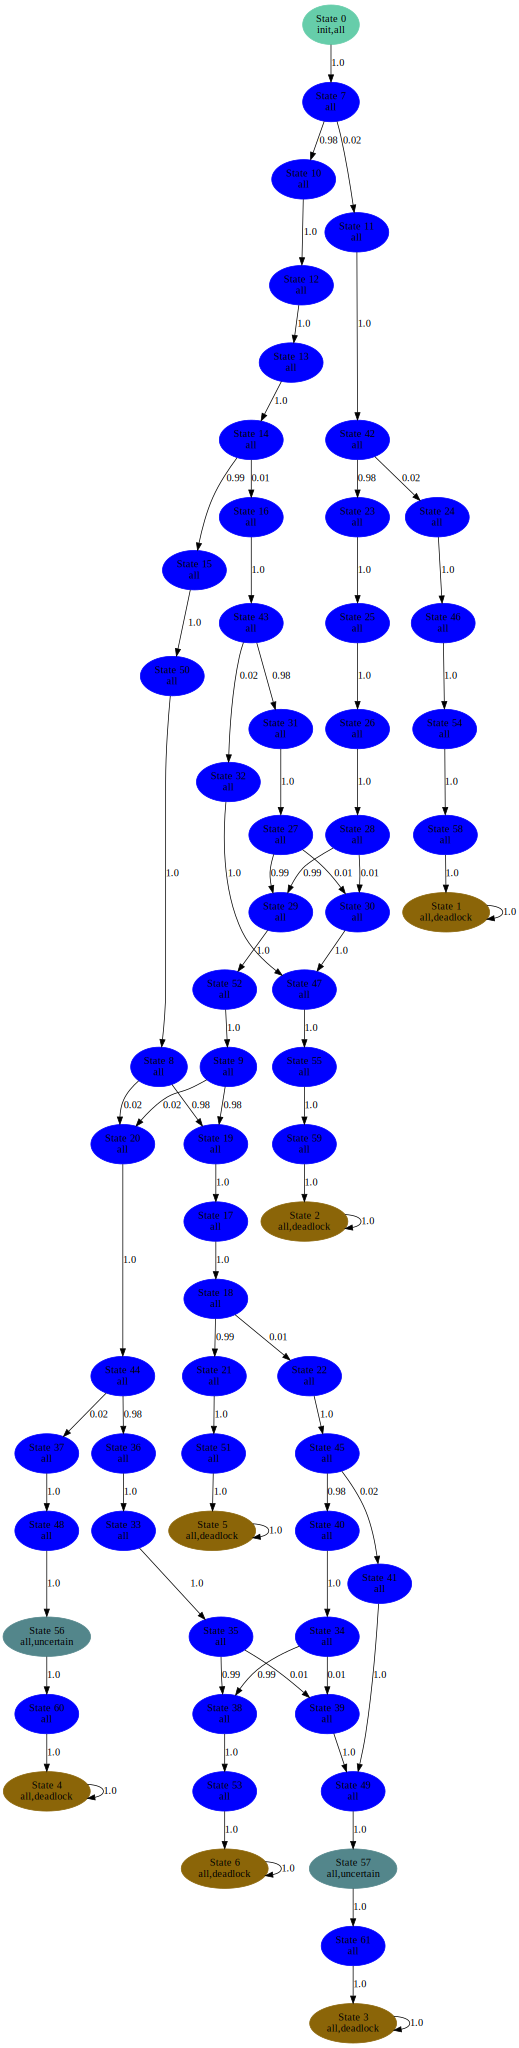

In [3]:
M.digraph()

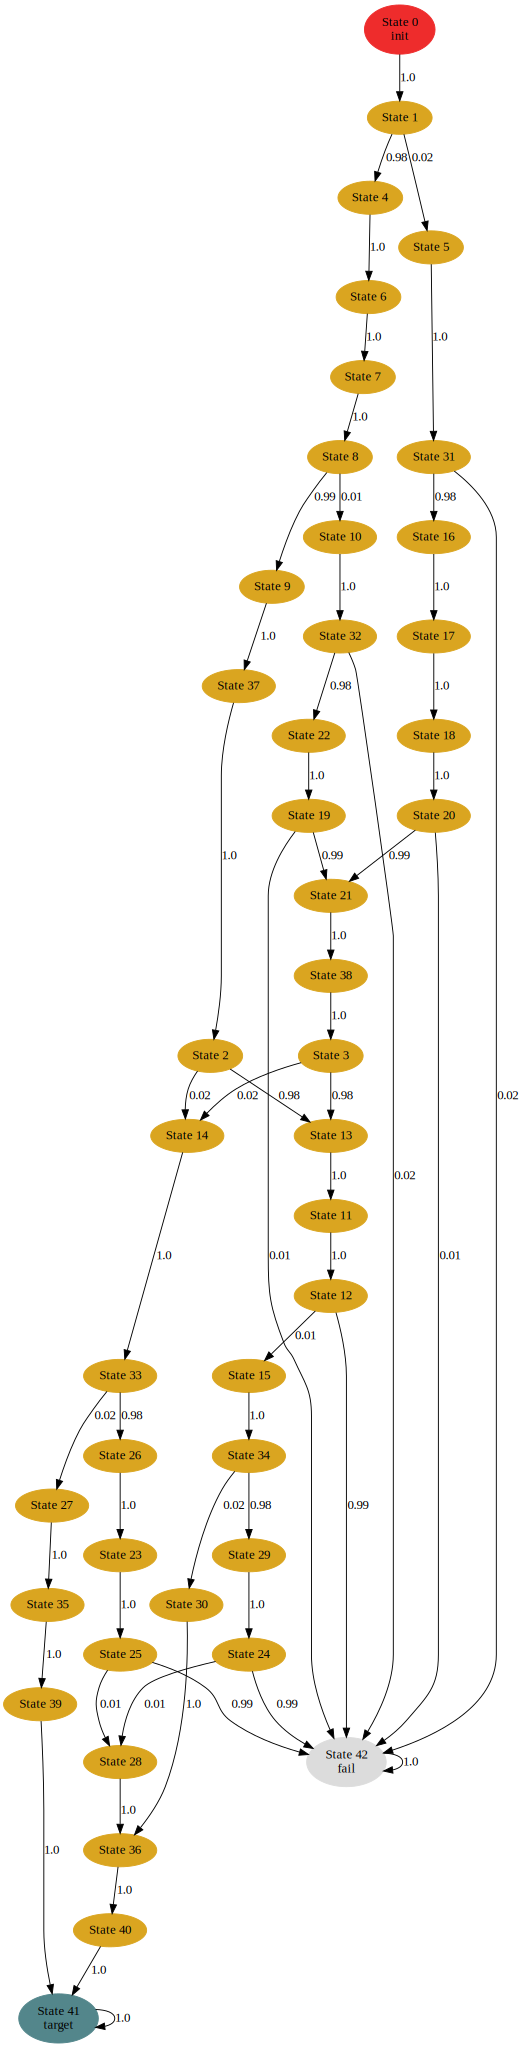

In [4]:
reach_form,_ = M.reachability_form("init","uncertain")
DTMC.from_reachability_form(reach_form).digraph()

In [5]:
qs_min_heur = QSHeur(0.0003,"min",solver_name="gurobi")
results = qs_min_heur.solve(reach_form)
print("-- results --")
for idx, r in enumerate(results):
    print("iter", idx,":",r)

-- results --
iter 0 : ProblemResult(status=success, result=ReachabilityForm(C=27, N=27, initial=0))
iter 1 : ProblemResult(status=success, result=ReachabilityForm(C=14, N=14, initial=0))
iter 2 : ProblemResult(status=success, result=ReachabilityForm(C=27, N=27, initial=0))


In [6]:
qs_max_heur = QSHeur(0.0008,"max",solver_name="cbc")
results = qs_max_heur.solve(reach_form)
print("-- results --")
for idx, r in enumerate(results):
    print("iter", idx,":",r)

-- results --
iter 0 : ProblemResult(status=success, result=ReachabilityForm(C=35, N=35, initial=0))
iter 1 : ProblemResult(status=success, result=ReachabilityForm(C=28, N=28, initial=0))
iter 2 : ProblemResult(status=success, result=ReachabilityForm(C=35, N=35, initial=0))
